In [1]:
#Sebastian Russo 79117092
#Artificial Intelligence

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pand 

#------------------------------------------------------------------------------------------------
#Import logistic regression model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#self-explanatory
from sklearn.linear_model import LogisticRegression 

#From the metrics module, import accurracy, f1, precision, recall
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#From the metrics module, import classifier report
from sklearn.metrics import classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as matplib  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

c:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import data set
dftitan= pand.read_csv("titanic.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 will set the column at location 0 as the index for all rows in the dataset

#View shape of dataset
print(dftitan.shape)

#Analyze dataset
dftitan.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check if there is any missing values in the data (should always be done in large datasets)
nummissingvalues=dftitan.isna().sum()

#Print to see the missing values
print(nummissingvalues)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
#Clean data by replacing missing values, drop unnecessary columns or columns with too many missing 
#values, convert categorical data into num variables

#Replace missing values in Age column with the median
dftitan["Age"]=dftitan["Age"].fillna(dftitan["Age"].median())

#Drop Cabin column because it has too many missing values and it's not really important 
dftitan=dftitan.drop("Cabin",axis=1)

#If a value in Embarked is missing, replace with most frequent value in said column
dftitan['Embarked'] = dftitan['Embarked'].fillna(dftitan['Embarked'].value_counts().idxmax())


#Convert categorical data into numerical variables
dftitan["Sex"]= dftitan["Sex"].map({"male":0,"female":1})
dftitan["Embarked"]= dftitan["Embarked"].map({"C":0, "Q":1, "S":2})

#Cleaned data
dftitanclean=dftitan

#Analyze dataset
dftitanclean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [5]:
#Split dataset into features for X and Y 
Xvariable=dftitanclean[["Pclass","Sex","Age"]]
Yvariable=dftitanclean["Survived"]

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)

Idependent variables: (891, 3)
Dependent variables: (891,)


In [6]:
#Split the Independent and Dependent variables into training and testing sets (75%, 25%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xvariable,Yvariable,test_size=0.25,random_state=1)

#Verify the shape for each split
print("Xtrain set:",Xtrain.shape)
print("Xtest set:",Xtest.shape)
print("Ytrain set:",Ytrain.shape)
print("Ytest set:",Ytest.shape)

Xtrain set: (668, 3)
Xtest set: (223, 3)
Ytrain set: (668,)
Ytest set: (223,)


In [7]:
#Create a model to classify death or survival outcome and train it
logreg= LogisticRegression(max_iter=50)
logreg.fit(Xtrain,Ytrain)

#Predict the outcome
predictY= logreg.predict(Xtest)

In [8]:
#Check real values vs the predicted values
print("Actual values",Ytest.values[0:30])
print("Predict values",predictY[0:30])

Actual values [1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1]
Predict values [1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1]


Simple confusion Matrix
[[109  19]
 [ 24  71]]


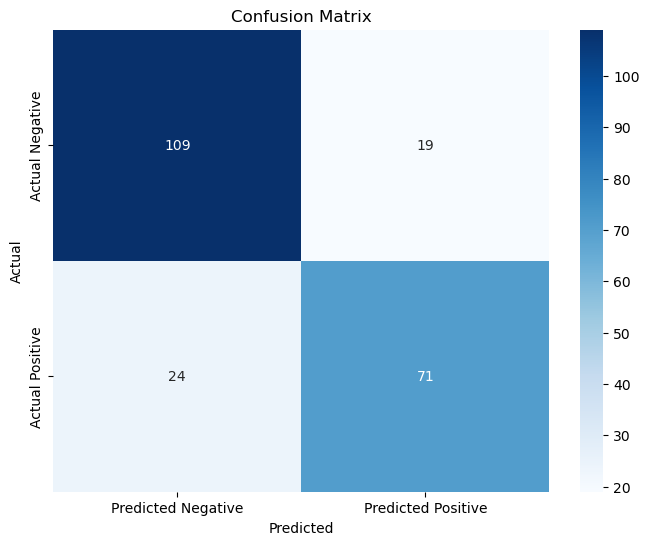

In [9]:
#Create confusion matrix
confmat=confusion_matrix(Ytest,predictY)

#Print confusion matrix
print("Simple confusion Matrix")
print(confmat)

#Create a heatmap to visualize the confusion matrix
matplib.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt='d',
            cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
matplib.xlabel('Predicted')
matplib.ylabel('Actual')
matplib.title('Confusion Matrix')
matplib.show()

In [10]:
#Check acurracy of this model
acurracy= accuracy_score(Ytest,predictY) #Ranges (0,1), the closer to 1 the better
print("Acurracy: ",acurracy)

# Calculate precision
precision = precision_score(Ytest, predictY)
print('Precision:', precision)
 
# Calculate recall
recall = recall_score(Ytest, predictY)
print('Recall:', recall)
 
# Calculate F1 score
f1 = f1_score(Ytest, predictY)
print('F1 Score:', f1)

# Print the classification report
clfrep= classification_report(Ytest,predictY)
print(clfrep)

Acurracy:  0.8071748878923767
Precision: 0.7888888888888889
Recall: 0.7473684210526316
F1 Score: 0.7675675675675676
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       128
           1       0.79      0.75      0.77        95

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

